# Reporte 10

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

- Julia Millen Massa Coronel 20196415

### Regresión discontinua

Explique de manera muy breve y resumida en qué consiste una regresión discontinua.
- La regresión discontinua es una forma de identificación causal ante experimentos naturales. Usualmente, la naturaleza no muestra saltos en sus continuidades, por lo que cuando vemos saltos y picos, probablemente sean situaciones artificiales y, a menudo, provocadas por el hombre. Explorar estos saltos artificiales es el núcleo del diseño de discontinuidad de regresión.

Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.
- Por ejemplo, podría usar la regresión discontinua para determinar el nivel de estrés en las alumnas de los colegios emblematicos basandome en la aleatorización que surge cuando en 3ro de secundaria deciden a qué área del curso de Educación para el trabajo van a ir: costura, repostería o cosmetología. Muchas veces no se trata de la afinidad de las alumnas a alguna de esas ramas, sino en una aleatorización por apellidos lo que determina en qué sección van a pasar los dos años que les resta en la secundaria. Al final podemos ver cuál de las tres áreas genera más estrés en las alumnas. 

Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).
- Tiene que ver con la regresión discontinua: La idea de la discontinuidad de la regresión es comparar el resultado justo por encima y por debajo del umbral para identificar el efecto del tratamiento en el umbral. Ese diseño es "nitido" en el sentido de que tus probabilidades de recibir tratamiento son "si o no", no hay punto medio (0 o 1). 

- En India el uso de Instagram está restringido a los 13 años. Mi variable es el grado de depresión en los adolescentes. Mi punto de corte natural es 13 años. Buscariamos ver si hay un gran saldo entre los 12 y 14 años en el grado de depresión adolescente (Bandwidth). Los menores de 13 serían el grupo de control y los de 13 años para arriba mi grupo de tratamiento. 

### Aplicaciones

- Siguiendo todo el apartado Datos simulados , trabaje con la siguiente simulación, según sea su caso, y replique los resultados correspondientes, incluidos los gráficos correspondientes.

- Ejemplo 1 $$
    Y = 15 + 22*D + 2.5 * X + e
$$

In [3]:
dat = pd.DataFrame({'x': np.random.normal(50, 15, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

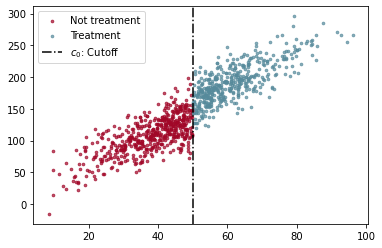

In [4]:
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [5]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

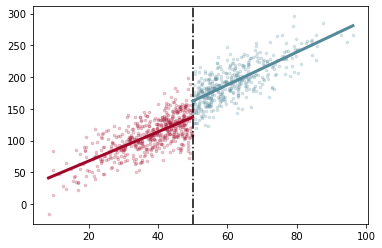

In [6]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [7]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 25.45


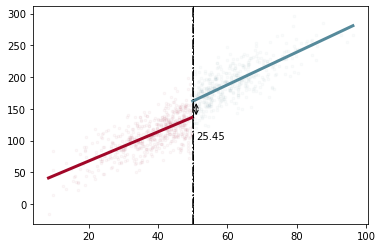

In [8]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

- Ejemplo 2
$$
    Y = 12 + 60*D + 1.3 * X + e
$$

In [13]:
dat = pd.DataFrame({'x': np.random.normal(50, 12, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

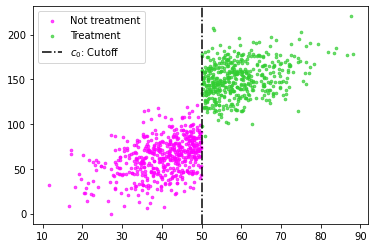

In [14]:
treat_c = "#32CD32" # Treatment
n_treat = "#FF00FF" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [15]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

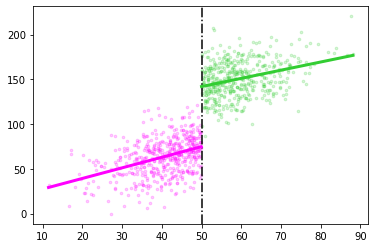

In [16]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [17]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 67.28


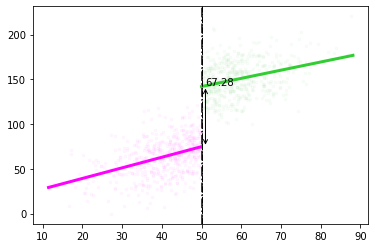

In [18]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

## LECTURA

El presente artículo busca caracterizar los factores que determinan quién se convierte en inventor en Estados Unidos. 

La única debilidad, para mí encontrada, es el sesgo que se crea al separar como cateogoría a la raza y etnia para realizar el análisis cuando al final solo se centran en los ingresos económicos de estas categorías: "Dado que  existen diferencias sgnificativas en los ingresos de los padres por raza y etnia, las dferencias brutas entre razas y etnias reflejan en parte el gradiente de ingresos que se muestran" 

 El artículo en principio busca mostrar que las probabilidades de que los niños se conviertan en inventores varían mucho de acuerdo a las caracteristicas al nacer: raza, sexo y clase socioeconómica de los papás. En ese sentido, el estudio sugiere que las diferencias podrían estar motivadas por las diferencias en el entorno más que por las capacidades de los niños para emprender. Por ejemplo, los niños cuya zona cuenta con una alta tasa de innovación tienen más probabilidades de convertirse en inventores y las niñas, a su vez, tienen más posibilidades de inventar en una determinada área si crecen en zonas con mujeres que inventen en esa área. Esto de cierta forma sugiere que hay muchos Einsteins perdidos entre mujeres, minorias en raza y niños con familias de bajos ingresos. En parte eso se logra explicar porque los niños de distintos origenes crecen en entornos diferentes y, por ello, acaban siguiendo carreras diferentes. 

Por ello, se llega a la conclusión de que para tener grandes repercusiones en la innovación agregada se debe aumentar la exposicón a la innovación entre los niños que destacan en matemáticas y ciencias a edades tempranas y que pertenecen a grupos infrarrepresentados. Sin embargo, eso no implica que el bienestar de las personas sea mayor a que si estas personas se dedican a la innvoación, ya que podrían estar dedicandose a otras carreras que también tienen importantes beneficios sociales. 
 
Sumado a eso, el análisis complementa a la literatura existente en el tema identificando otros factores que afectan la elección de la carrera (exposión en la infancia) y presentando datos exhaustivos y estadisticos disponibles públicamente sobre el origen y la carrera de los inventores en USA. 

Un siguiente paso para seguir en la pregunta de investigación del presente artículo es investigar sobre cuáles serían las orientaciones directas en las políticas pAa aumentar la exposición a la innovación.Además, que resultaría interesante realizar el mismo enálisis en países tercermundistas que de por sí no tienen entornos donde hayan muchos inventores. 